# Работа с текстовыми данными (часть 2)

Задание: Обучите модель для определения принадлежности текста к одному из заданных классов. При разборе текста используйте разбор текста по частям речи

Для решения этого задания мы будем использовать библиотеку SpaCy (https://spacy.io/).
Библиотека spaCy выделяется своей эффективностью и производительностью. Она разработана с акцентом на скорость и точность, что делает ее предпочтительным выбором для многих разработчиков и исследователей в области NLP.

Основные концепции spaCy:

1. Токенизация и сегментация текста

2. Разделение текста на слова и пунктуацию.

Модели spaCy основаны на современных архитектурах глубокого обучения, таких как конволюционные нейронные сети (CNN) и рекуррентные нейронные сети (RNN). Они используют векторные представления слов (word vectors) для улучшения качества обработки текста.

Для начала установим эту библиотеку и скачаем необходимые модели:

*Примечание*:

..._lg = large

..._md = medium

..._sm = small

Все модели бывают 3 типов, как Вы видите, в зависимости от размеров.
В зависимости от задачи и используемых метрик, можно использовать разные модели. Большие модели обладают ольшей accuracy, но и большим весом, у маленьких моделей accuracy, вероятно, будет ниже, однако, они обладают меньшим весом и могут быть использованы, например, для мобильных приложений.

В Colab spaCy уже установлена. Чтобы установить на Вашем компьютере, следуйте инструкциям https://spacy.io/usage

In [ ]:
#проверка, что модели адекватно скачались
!python -m spacy validate

✔ Loaded compatibility table

================= Installed pipeline packages (spaCy v3.7.5) =================
ℹ spaCy installation: /usr/local/lib/python3.10/dist-packages/spacy

NAME             SPACY            VERSION                            
en_core_web_sm   >=3.7.2,<3.8.0   3.7.1   ✔



In [ ]:
# скачать модель для русского языка
!python -m spacy download fr_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 81.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# импортируем необходимые модули для нашей работы

import spacy
from spacy import displacy

import os
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

Для начала просто "поиграем" с библиотекой и посмотрим на её возможности:

##### Токенизация текста

In [ ]:
# Загружаем языковую модель
nlp = spacy.load("en_core_web_sm")

# Входной текст
text = "l'espace est un outil incroyable pour le traitement du langage naturel."

# Применяем токенизацию
doc = nlp(text)

# Выводим токены (слова и пунктуацию) из текста
for token in doc:
    print(token.text)

l'espace
est
un
outil
incroyable
pour
le
traitement
du
langage
naturel
.


##### Разбиение текста на предложения

In [ ]:
# Входной текст с несколькими предложениями
text =  "L'espace est rapide. C'est aussi efficace."

# Применяем разбиение на предложения
doc = nlp(text)

# Выводим предложения из текста
for sentence in doc.sents:
    print(sentence.text)

L'espace est rapide.
C'est aussi efficace.


##### Частеречная разметка (POS-тегирование)

**Определение частей речи слов**

Частеречная разметка (Part-of-Speech tagging или POS-тегирование) – это процесс присвоения каждому слову в тексте определенной метки, соответствующей его грамматической роли. SpaCy предоставляет мощные инструменты для выполнения этой задачи.

**Значение частей речи для анализа текста**

Части речи являются ключевыми элементами анализа текста, поскольку они раскрывают структуру и смысл предложения. Различные части речи могут указывать на субъект, объект, действие, качество и т.д. Эта информация имеет большое значение для множества приложений, от анализа тональности до извлечения информации.

In [ ]:
# Входной текст
text = "J'aime lire des livres."

# Применяем анализ
doc = nlp(text)

# Выводим слова и их части речи
for token in doc:
    print(token.text, token.pos_)

J'aime PROPN
lire PROPN
des PROPN
livres VERB
. PUNCT


##### Лемматизация и нормализация

Приведение слов к их базовой форме

**Лемматизация** - это процесс приведения слова к его базовой форме (лемме) путем удаления окончаний и суффиксов. Это помогает унифицировать различные формы слова и улучшить точность анализа.

**Важность лемматизации при анализе текста**

Лемматизация позволяет снизить размерность данных, учитывая только базовые формы слов. Это особенно полезно, например, при анализе тональности, чтобы учесть все формы одного слова, когда выражается какой-либо оттенок.

In [ ]:
text = "Tu cours les chiens aboient joyeusement syafiah."

doc = nlp(text)

for token in doc:
    print(token.text, token.lemma_)

Tu Tu
cours cour
les les
chiens chien
aboient aboient
joyeusement joyeusement
syafiah syafiah
. .


##### Именованная сущность (NER)

Обнаружение и классификация именованных сущностей

**Именованные сущности (Named Entities)** - это объекты реального мира, которые можно идентифицировать по имени, такие как имена людей, места, даты, организации и т.д. Извлечение и классификация именованных сущностей является важной задачей в NLP. SpaCy предоставляет удобные инструменты для этой цели.

**Применение NER в задачах информационного поиска**

Извлечение именованных сущностей имеет множество применений. В информационном поиске, например, оно может быть использовано для автоматической классификации документов по тематикам, выделения ключевых фактов или для создания связей между сущностями.

In [ ]:
text = "VK est situé à Saint-Pétersbourg"

doc = nlp(text)

for ent in doc.ents:
    print(ent.text, ent.label_)

situé à Saint-Pétersbourg FAC


##### Работа с векторными представлениями

**Векторные представления слов** - это числовые векторы, представляющие слова в многомерном пространстве таким образом, что семантически близкие слова имеют близкие векторы. Это понятие основано на гипотезе о дистрибутивности, согласно которой слова, используемые в похожих контекстах, имеют схожие значения.

**Использование встроенных векторов слов в spaCy**

Одной из мощных особенностей spaCy является наличие встроенных векторов слов, которые могут быть использованы для анализа семантической близости и сходства между словами. Эти векторы обучены на больших объемах текста и позволяют сравнивать слова на основе их семантического значения.

Для примера, используем векторное представление для сравнения двух слов:

In [ ]:
# Получаем векторное представление слова "puppy"
vector_puppy = nlp("chiot").vector

# Получаем векторное представление слова "dog"
vector_dog = nlp("chien").vector

# Вычисляем косинусное расстояние между векторами
similarity = np.dot(vector_puppy, vector_dog) / np.linalg.norm(vector_puppy) * np.linalg.norm(vector_dog)

print("Similarity between 'puppy' and 'dog':", similarity)

Similarity between 'puppy' and 'dog': 51.857727


Также в spacy представлена возможность визуализировать состав предложения:

In [ ]:
text = "Renard brun rapide saute par-dessus le chien paresseux"
doc = nlp(text)

displacy.render(doc, style='dep', jupyter=True,options={'distance': 140})

In [ ]:
spacy.explain("amod")

'adjectival modifier'

In [ ]:
spacy.explain("ADJ"),spacy.explain("det") ,spacy.explain("ADP") ,spacy.explain("prep") ,spacy.explain("amod"),spacy.explain("case"),spacy.explain("nmod"),spacy.explain("conj")

('adjective',
 'determiner',
 'adposition',
 'prepositional modifier',
 'adjectival modifier',
 'case marking',
 'modifier of nominal',
 'conjunct')

Перейдём к нашему основному заданию.

Проанализируем стихотворения С.А.Есенина и других случайных авторов и попробуем решить задачу бинарной классификации.

Файлы доступны по ссылке https://disk.yandex.ru/d/y3y3dCl-2-dN5g

In [ ]:
data = pd.read_csv('/content/datafake.csv', delimiter=';', encoding='utf-8')
data = data.iloc[:400]
data

,media,post,fake
0,unknown,Sénatoriales : les résultats des élections.La ...,0
1,unknown,Live Spécial François Fillon\r\n27,1
2,unknown,Notre-Dame-des-Landes : « La décision prise pa...,0
3,unknown,"Chasse: silence, on tire.Avec l'autorisation d...",0
4,unknown,Payet lance un appel à l’OM : « S’il vous plaî...,1
...,...,...,...
395,unknown,LUTTES\r\nPourquoi une centaine de travailleur...,0
396,unknown,TÉMOIGNAGES\r\nAffaire Cardonna : «Pascal m’a ...,0
397,unknown,Trump – « Si je deviens Président des États-Un...,1
398,unknown,La France libre : quand un cadre de LR anime u...,0


In [ ]:
# посмотрим распределение датасета по классам
data['fake'].value_counts()

,count
fake,
0,215
1,185


Сначала мы используем возможности Spacy для извлечения векторов из текста и построения модели классификации.

Векторы в spaCy строятся с использованием предварительно обученных моделей, которые обучаются на больших корпусах текста. Эти модели используют алгоритмы глубокого обучения для извлечения семантической информации из текста и представления ее в виде числовых векторов.

Процесс построения векторов в spaCy включает следующие шаги:

1. Загрузка предварительно обученной модели spaCy для выбранного языка. Например, вы можете загрузить модель "en_core_web_sm" для английского языка с помощью команды nlp = spacy.load("ru_core_news_lg").

2. Обработка текста с помощью объекта nlp. Это преобразует текст в объект, который содержит различные атрибуты и методы для работы с текстом.

3. Для каждого токена в тексте можно получить его векторное представление с помощью атрибута token.vector. Вектор представляет собой числовое представление, которое кодирует семантическую информацию о токене.

In [ ]:
nlp_fr = spacy.load("fr_core_news_sm")
data['vector'] = data['post'].apply(lambda text:nlp_fr(text).vector)

In [ ]:
data['vector'].loc[0].shape

(96,)

Далее переходим к уже привычному нам способу построения моделей:

In [ ]:
X = pd.DataFrame(data['vector'].to_list())
y = data['fake']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
res_knn = knn_model.predict(X_test)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
res_nb = nb_model.predict(X_test)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
res_dt = dt_model.predict(X_test)

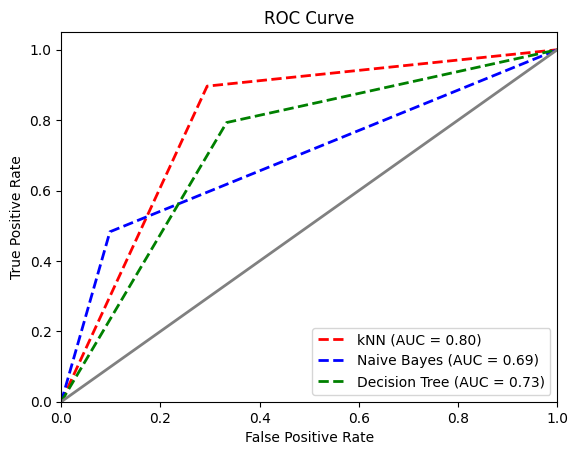

In [ ]:
# Вычисление ROC-кривых
fpr_knn, tpr_knn, _ = roc_curve(y_test, res_knn)
fpr_nb, tpr_nb, _ = roc_curve(y_test, res_nb)
fpr_dt, tpr_dt, _ = roc_curve(y_test, res_dt)

# Рассчитать площадь под ROC-кривой (AUC-ROC)
auc_knn = roc_auc_score(y_test, res_knn)
auc_nb = roc_auc_score(y_test, res_nb)
auc_dt = roc_auc_score(y_test, res_dt)

# Визуализировать ROC-кривую
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, linestyle='--', label=f'kNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, linestyle='--', label=f'Naive Bayes (AUC = {auc_nb:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, linestyle='--', label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

<Axes: title={'center': 'Conf matrix DT'}>

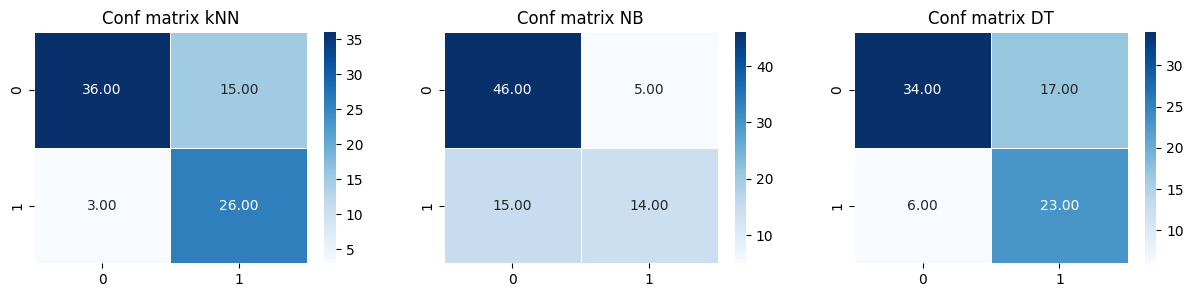

In [ ]:
plt.figure(figsize=(15,3))

conf_matrix_knn = confusion_matrix(y_test, res_knn)
conf_matrix_nb = confusion_matrix(y_test, res_nb)
conf_matrix_dt = confusion_matrix(y_test, res_dt)

plt.subplot(1, 3, 1)
plt.title('Conf matrix kNN')
sns.heatmap(conf_matrix_knn,cmap='Blues',annot=True, fmt=".2f", linewidths=0.5)

plt.subplot(1, 3, 2)
plt.title('Conf matrix NB')
sns.heatmap(conf_matrix_nb,cmap='Blues',annot=True, fmt=".2f", linewidths=0.5)

plt.subplot(1, 3, 3)
plt.title('Conf matrix DT')
sns.heatmap(conf_matrix_dt,cmap='Blues',annot=True, fmt=".2f", linewidths=0.5)

In [ ]:
print('Результат kNN: \n', classification_report(y_test, res_knn))
print('Результат NB: \n', classification_report(y_test, res_nb))
print('Результат Decision Tree: \n', classification_report(y_test, res_dt))

Результат kNN: 
               precision    recall  f1-score   support

           0       0.92      0.71      0.80        51
           1       0.63      0.90      0.74        29

    accuracy                           0.78        80
   macro avg       0.78      0.80      0.77        80
weighted avg       0.82      0.78      0.78        80

Результат NB: 
               precision    recall  f1-score   support

           0       0.75      0.90      0.82        51
           1       0.74      0.48      0.58        29

    accuracy                           0.75        80
   macro avg       0.75      0.69      0.70        80
weighted avg       0.75      0.75      0.74        80

Результат Decision Tree: 
               precision    recall  f1-score   support

           0       0.85      0.67      0.75        51
           1       0.57      0.79      0.67        29

    accuracy                           0.71        80
   macro avg       0.71      0.73      0.71        80
weighted avg  

kNN показывает хорошую точность для класса 0 (0.92) и высокую полноту для класса 1 (0.90). Однако полнота для класса 0 ниже (0.71), что указывает на то, что модель не всегда правильно идентифицирует экземпляры класса 0. Общая точность модели составляет 78%, что является довольно хорошим показателем.

NB показывает хорошую полноту для класса 0 (0.90), но низкую полноту для класса 1 (0.48). Это указывает на то, что модель плохо идентифицирует экземпляры класса 1. Общая точность модели составляет 75%, что ниже, чем у kNN.

Decision Tree показывает хорошую полноту для класса 1 (0.79), но низкую полноту для класса 0 (0.67). Общая точность модели составляет 71%, что является самым низким показателем среди трех моделей.

Теперь попробуем использовать другой подход к выделению признаков из текста. **Мы посчитаем, сколько частей речи каждого типа находится в каждом тексте и срежнее положение этой части речи в тексте.**

В Spacy используются следующие части речи:

1. ADJ: adjective/прилагательное
2. ADP: adposition/дополнение
3. ADV: adverb/наречие
4. AUX: auxiliary/вспомогательный
5. CCONJ: coordinating conjunction/сочинительный союз (и, да и др.)
6. DET: determiner/определитель (a/an и the)
7. INTJ: interjection/междометие
8. NOUN: noun/существительное
9. NUM: numeral/числительное
10. PART: particle/частица
11. PRON: pronoun/местоимение
12. PROPN: proper noun/имя собственное
13. PUNCT: punctuation/знаки препинания
14. SCONJ: subordinating conjunction/подчинительный союз (когда, что, чтобы и др.)
15. SYM: symbol/символ
15. VERB: verb/глагол
16. X: other/другое

Это далеко не полный список всех частей речи(POS), которые используются в Spacy. С полным списком можно ознакомиться по [ссылке](https://github.com/explosion/spaCy/blob/master/spacy/glossary.py)

In [ ]:
nlp_fr = spacy.load("fr_core_news_sm")
data_2 = data.drop(columns='media')
data_2

,post,fake,vector
0,Sénatoriales : les résultats des élections.La ...,0,"[-0.37009668, 0.7008308, 0.3608723, -0.0876415..."
1,Live Spécial François Fillon\r\n27,1,"[-2.3430345, 0.7549248, -1.3799728, 1.2625424,..."
2,Notre-Dame-des-Landes : « La décision prise pa...,0,"[0.30034542, 0.1440687, -0.3725913, 0.31185773..."
3,"Chasse: silence, on tire.Avec l'autorisation d...",0,"[-0.0583627, -0.009533854, 0.4839819, 0.088400..."
4,Payet lance un appel à l’OM : « S’il vous plaî...,1,"[0.28041154, 0.0951502, -0.10685828, -0.166566..."
...,...,...,...
395,LUTTES\r\nPourquoi une centaine de travailleur...,0,"[0.42606008, -0.06607426, 0.37338114, 0.195529..."
396,TÉMOIGNAGES\r\nAffaire Cardonna : «Pascal m’a ...,0,"[-0.87862414, 0.3716709, -0.011577731, 0.11267..."
397,Trump – « Si je deviens Président des États-Un...,1,"[0.1213207, 0.08793596, -0.30583578, -0.138934..."
398,La France libre : quand un cadre de LR anime u...,0,"[0.72874004, -0.26876542, -0.43250397, 0.15068..."


Для подсчёта мы применим языковую модель к каждому стиху в датафрейме, извлечём информацию о частях речи для каждого токена и посчитаем среднюю позицию в тексте и количество токенов соответствующего типа для каждого текста.
Мы проверяём расстановку в тексте только 11 частей речи. Можно попробовать добавить новые (это дополнительное задание)

In [ ]:
import warnings

# Убрать предупреждения
warnings.filterwarnings('ignore')

# Функция для применения разбиения на части речи к тексту
def apply_pos(text):
    doc = nlp_fr(text)
    pos_tags = [token.pos_ for token in doc]
    return np.array(pos_tags)

# Создание пустого датафрейма
df = pd.DataFrame()

for i in range(data_2.shape[0]):
    PoS_list = apply_pos(data_2.iloc[i]['post'])
    df = pd.concat([df, pd.DataFrame({
    'ADJ': [np.sum(np.where(PoS_list == 'ADJ')[0])/np.where(PoS_list == 'ADJ')[0].shape[0]],
    'ADJ_col': [np.where(PoS_list == 'ADJ')[0].shape[0]],
    'ADP': [np.sum(np.where(PoS_list == 'ADP')[0])/np.where(PoS_list == 'ADP')[0].shape[0]],
    'ADP_col': [np.where(PoS_list == 'ADP')[0].shape[0]],
    'ADV': [np.sum(np.where(PoS_list == 'ADV')[0])/np.where(PoS_list == 'ADV')[0].shape[0]],
    'ADV_col': [np.where(PoS_list == 'ADV')[0].shape[0]],
    'AUX': [np.sum(np.where(PoS_list == 'AUX')[0])/np.where(PoS_list == 'AUX')[0].shape[0]],
    'AUX_col': [np.where(PoS_list == 'AUX')[0].shape[0]],
    'CCONJ': [np.sum(np.where(PoS_list == 'CCONJ')[0])/np.where(PoS_list == 'CCONJ')[0].shape[0]],
    'CCONJ_col': [np.where(PoS_list == 'CCONJ')[0].shape[0]],
    'DET': [np.sum(np.where(PoS_list == 'DET')[0])/np.where(PoS_list == 'DET')[0].shape[0]],
    'DET_col': [np.where(PoS_list == 'DET')[0].shape[0]],
    'INTJ': [np.sum(np.where(PoS_list == 'INTJ')[0])/np.where(PoS_list == 'INTJ')[0].shape[0]],
    'INTJ_col': [np.where(PoS_list == 'INTJ')[0].shape[0]],
    'NOUN': [np.sum(np.where(PoS_list == 'NOUN')[0])/np.where(PoS_list == 'NOUN')[0].shape[0]],
    'NOUN_col': [np.where(PoS_list == 'NOUN')[0].shape[0]],
    'NUM': [np.sum(np.where(PoS_list == 'NUM')[0])/np.where(PoS_list == 'NUM')[0].shape[0]],
    'NUM_col': [np.where(PoS_list == 'NUM')[0].shape[0]],
    'PART': [np.sum(np.where(PoS_list == 'PART')[0])/np.where(PoS_list == 'PART')[0].shape[0]],
    'PART_col': [np.where(PoS_list == 'PART')[0].shape[0]],
    'PRON': [np.sum(np.where(PoS_list == 'PRON')[0])/np.where(PoS_list == 'PRON')[0].shape[0]],
    'PRON_col': [np.where(PoS_list == 'PRON')[0].shape[0]],
    'PUNCT': [np.sum(np.where(PoS_list == 'PUNCT')[0])/np.where(PoS_list == 'PUNCT')[0].shape[0]],
    'PUNCT_col': [np.where(PoS_list == 'PUNCT')[0].shape[0]],
    'SCONJ': [np.sum(np.where(PoS_list == 'PUNCT')[0])/np.where(PoS_list == 'PUNCT')[0].shape[0]],
    'SCONJ_col': [np.where(PoS_list == 'PUNCT')[0].shape[0]],
    'VERB': [np.sum(np.where(PoS_list == 'PUNCT')[0])/np.where(PoS_list == 'PUNCT')[0].shape[0]],
    'VERB_col': [np.where(PoS_list == 'PUNCT')[0].shape[0]],

    'PROPN': [np.sum(np.where(PoS_list == 'PROPN')[0])/np.where(PoS_list == 'PROPN')[0].shape[0]],
    'PROPN_col': [np.where(PoS_list == 'PROPN')[0].shape[0]],
    'SYM': [np.sum(np.where(PoS_list == 'SYM')[0])/np.where(PoS_list == 'SYM')[0].shape[0]],
    'SYM_col': [np.where(PoS_list == 'SYM')[0].shape[0]],
    'X': [np.sum(np.where(PoS_list == 'X')[0])/np.where(PoS_list == 'X')[0].shape[0]],
    'X_col': [np.where(PoS_list == 'X')[0].shape[0]]
    })], axis=0)

In [ ]:
df = df.reset_index()
df = df.drop(columns='index')
df

,ADJ,ADJ_col,ADP,ADP_col,ADV,ADV_col,AUX,AUX_col,CCONJ,CCONJ_col,...,SCONJ,SCONJ_col,VERB,VERB_col,PROPN,PROPN_col,SYM,SYM_col,X,X_col
0,35.000000,3,17.500000,6,28.000000,2,18.333333,3,19.000000,1,...,19.000000,5,19.000000,5,25.000000,1,NaN,0,NaN,0
1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,...,NaN,0,NaN,0,2.000000,3,NaN,0,0.000000,1
2,18.500000,4,27.900000,10,26.500000,2,18.500000,2,NaN,0,...,23.166667,6,23.166667,6,40.200000,10,NaN,0,NaN,0
3,18.000000,1,16.750000,4,30.333333,3,38.000000,1,22.000000,1,...,15.166667,6,15.166667,6,0.000000,1,NaN,0,NaN,0
4,216.076923,26,223.410959,73,213.285714,21,206.266667,15,215.000000,6,...,223.214286,42,223.214286,42,188.275000,40,NaN,0,363.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,38.000000,3,29.000000,14,8.500000,2,34.000000,2,32.000000,2,...,36.800000,5,36.800000,5,15.500000,2,NaN,0,NaN,0
396,1302.292181,243,1348.482394,284,1339.231343,134,1203.131579,38,1091.666667,21,...,1341.194103,407,1341.194103,407,1303.046099,282,NaN,0,1196.535714,28
397,275.200000,25,235.326923,52,242.229167,48,288.882353,17,293.333333,6,...,268.415385,65,268.415385,65,207.416667,24,NaN,0,405.000000,1
398,26.000000,3,21.857143,7,29.000000,1,28.000000,1,38.000000,1,...,21.200000,5,21.200000,5,31.000000,9,NaN,0,NaN,0


In [ ]:
# Восстановить предупреждения (если нужно)
warnings.filterwarnings('default')

df = df.fillna(0) #не все части речи есть во всех предложениях, так что нам нужно избавиться от na

#добавим в полученный датафрейм колонку класс
df['fake'] = data_2['fake']

#перемешиваем данные
df = df.sample(frac=1).reset_index(drop=True)

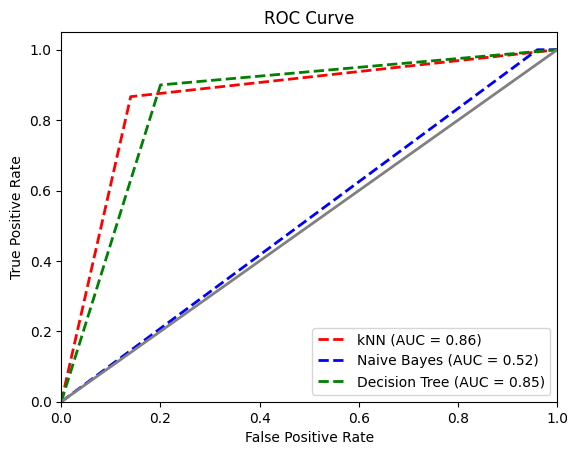

In [ ]:
# Переходим к привычному обучению моделей и анализу результатов
X = df.drop(columns=['fake'])
y = df['fake']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)


knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
res_knn_2 = knn_model.predict(X_test)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
res_nb_2 = nb_model.predict(X_test)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
res_dt_2 = dt_model.predict(X_test)

# Вычисление ROC-кривых
fpr_knn, tpr_knn, _ = roc_curve(y_test, res_knn_2)
fpr_nb, tpr_nb, _ = roc_curve(y_test, res_nb_2)
fpr_dt, tpr_dt, _ = roc_curve(y_test, res_dt_2)

# Рассчитать площадь под ROC-кривой (AUC-ROC)
auc_knn = roc_auc_score(y_test, res_knn_2)
auc_nb = roc_auc_score(y_test, res_nb_2)
auc_dt = roc_auc_score(y_test, res_dt_2)

# Визуализировать ROC-кривую
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, linestyle='--', label=f'kNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, linestyle='--', label=f'Naive Bayes (AUC = {auc_nb:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, linestyle='--', label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

<Axes: title={'center': 'Conf matrix DT'}>

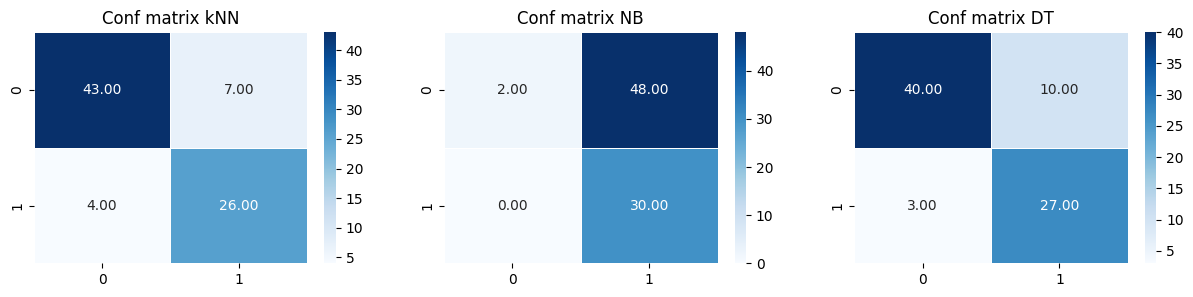

In [ ]:
plt.figure(figsize=(15,3))

conf_matrix_knn = confusion_matrix(y_test, res_knn_2)
conf_matrix_nb = confusion_matrix(y_test, res_nb_2)
conf_matrix_dt = confusion_matrix(y_test, res_dt_2)

plt.subplot(1, 3, 1)
plt.title('Conf matrix kNN')
sns.heatmap(conf_matrix_knn,cmap='Blues',annot=True, fmt=".2f", linewidths=0.5)

plt.subplot(1, 3, 2)
plt.title('Conf matrix NB')
sns.heatmap(conf_matrix_nb,cmap='Blues',annot=True, fmt=".2f", linewidths=0.5)

plt.subplot(1, 3, 3)
plt.title('Conf matrix DT')
sns.heatmap(conf_matrix_dt,cmap='Blues',annot=True, fmt=".2f", linewidths=0.5)

In [ ]:
print('Результат kNN: \n', classification_report(y_test, res_knn_2))
print('Результат NB: \n', classification_report(y_test, res_nb_2))
print('Результат Decision Tree: \n', classification_report(y_test, res_dt_2))

Результат kNN: 
               precision    recall  f1-score   support

           0       0.91      0.86      0.89        50
           1       0.79      0.87      0.83        30

    accuracy                           0.86        80
   macro avg       0.85      0.86      0.86        80
weighted avg       0.87      0.86      0.86        80

Результат NB: 
               precision    recall  f1-score   support

           0       1.00      0.04      0.08        50
           1       0.38      1.00      0.56        30

    accuracy                           0.40        80
   macro avg       0.69      0.52      0.32        80
weighted avg       0.77      0.40      0.26        80

Результат Decision Tree: 
               precision    recall  f1-score   support

           0       0.93      0.80      0.86        50
           1       0.73      0.90      0.81        30

    accuracy                           0.84        80
   macro avg       0.83      0.85      0.83        80
weighted avg  

kNN показывает наилучшие результаты по общей точности и F1-мере среди трех моделей. Она лучше всего справляется с предсказанием как класса 0, так и класса 1.

NB имеет крайне низкую полноту для класса 0, что делает её непригодной для практического использования.

Decision Tree также демонстрирует хорошие результаты, но немного уступает kNN.